# Join GIS data to .DAT file (valuergeneral pricing)

In [2]:
import geopandas as gpd
from pathlib import Path

DATA_DIR = (Path().resolve().parent / "data" )

natmaps_filepath = DATA_DIR / "01_interim/nationalmaps/joined_nationalmaps.shp"
df_gis = gpd.read_file(natmaps_filepath)

In [3]:
df_gis.head(2)

,STE_CODE21,STE_NAME21,GCC_CODE21,GCC_NAME21,SA4_CODE21,SA4_NAME21,SA3_CODE21,SA3_NAME21,SA2_CODE21,SA2_NAME21,...,P50_54,P55_59,P60_64,P65_69,P70_74,P75_79,P80_84,P85_and_ov,OBS_VALUE,geometry
0,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021007,Braidwood,...,318,355,447,343,270,260,128,87,3650,"POLYGON ((149.58423 -35.44427, 149.58444 -35.4..."
1,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021008,Karabar,...,569,594,458,438,294,246,166,113,6895,"POLYGON ((149.21898 -35.36739, 149.21799 -35.3..."


In [4]:
import pandas as pd

df_dat = pd.read_csv(DATA_DIR / "01_interim/valuergeneral/001_SALES_DATA_NNME.csv")
print(f"Shape: {df_dat.shape=}")
# csv is without index name
df_dat.rename(columns={"Unnamed: 0": "index"}, inplace=True)
df_dat.head()

Shape: df_dat.shape=(58258, 42)


,index,fileType,districtCode,downloadDateTime,submitterUserId,districtCode.1,propertyId,saleCounter,downloadDateTime.1,propertyName,...,propertyLegalDescription,districtCode.3,propertyId.2,saleCounter.2,downloadDateTime.3,purchaserVendor,totalRecords,totalBRecords,totalCRecords,totalDRecords
0,0,RTSALEDATA,103.0,20220103 01:26,VALNET,103.0,3177743.0,1.0,20220103 01:27,NaN,...,20/SP75063,103,3177743,1,20220103 01:27,P,46.0,8.0,8.0,28.0
1,1,NaN,NaN,NaN,NaN,103.0,1177555.0,2.0,20220103 01:27,NaN,...,20/12991,103,3177743,1,20220103 01:27,P,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,103.0,4400995.0,3.0,20220103 01:27,NaN,...,63/1269140,103,3177743,1,20220103 01:27,V,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,103.0,1179345.0,4.0,20220103 01:27,NaN,...,15/24087,103,3177743,1,20220103 01:27,V,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,103.0,2939227.0,5.0,20220103 01:27,NaN,...,12/1045409,103,1177555,2,20220103 01:27,P,NaN,NaN,NaN,NaN


In [5]:
# Number of co-occuring missing values
df_dat.isna().sum(axis=1).value_counts()

36    38112
12    12838
14     2788
4      2341
13      670
15      580
6       488
11      242
5        80
7        71
3        23
31       15
16       10
Name: count, dtype: int64

In [6]:
df_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58258 entries, 0 to 58257
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     58258 non-null  int64  
 1   fileType                  3003 non-null   object 
 2   districtCode              3003 non-null   float64
 3   downloadDateTime          3003 non-null   object 
 4   submitterUserId           3003 non-null   object 
 5   districtCode.1            20131 non-null  float64
 6   propertyId                20131 non-null  float64
 7   saleCounter               20131 non-null  float64
 8   downloadDateTime.1        20131 non-null  object 
 9   propertyName              350 non-null    object 
 10  propertyUnitNumber        5696 non-null   object 
 11  propertyHouseNumber       19713 non-null  object 
 12  propertyStreetName        20131 non-null  object 
 13  propertyLocality          20131 non-null  object 
 14  proper

Get the Property address for GPS lookup

In [7]:

prop_cols = ["propertyUnitNumber", "propertyHouseNumber","propertyStreetName","propertyLocality","propertyPostCode"]
prop_cols_idx = df_dat.columns.get_indexer(prop_cols)
df_dat.iloc[:, prop_cols_idx]

,propertyUnitNumber,propertyHouseNumber,propertyStreetName,propertyLocality,propertyPostCode
0,20,59,KEMBLA ST,WOLLONGONG,2500.0
1,NaN,28,PARK RD,WOONONA,2517.0
2,NaN,808 C,LAWRENCE HARGRAVE DR,COLEDALE,2515.0
3,NaN,51,PHILLIPS CRES,MANGERTON,2500.0
4,NaN,16,WILSONS CREEK RD,HELENSBURGH,2508.0
...,...,...,...,...,...
58253,NaN,NaN,NaN,NaN,NaN
58254,NaN,NaN,NaN,NaN,NaN
58255,NaN,NaN,NaN,NaN,NaN
58256,NaN,NaN,NaN,NaN,NaN


In [8]:
from typing import List

def addressstr(df_dat, 
               prop_cols = ["propertyUnitNumber", "propertyHouseNumber","propertyStreetName","propertyLocality","propertyPostCode"]
               ) -> List[str]:
    """Create string address from address columns. Converts NaNs to blanks."""
    a = []
    for row in df_dat.loc[:,prop_cols].itertuples():
        address_template = ((f"U {str(row[1])}" if not pd.isna(row[1]) else "") \
                            + f"{str(row[2])} {row[3]} {row[4]}" + f" {str(int(row[5]))}" if not pd.isna(row[5]) else "")
        a.append(address_template)
    return a

addresses = addressstr(df_dat, prop_cols)
df_dat['address_str'] = addresses
df_dat.columns

Index(['index', 'fileType', 'districtCode', 'downloadDateTime',
       'submitterUserId', 'districtCode.1', 'propertyId', 'saleCounter',
       'downloadDateTime.1', 'propertyName', 'propertyUnitNumber',
       'propertyHouseNumber', 'propertyStreetName', 'propertyLocality',
       'propertyPostCode', 'area', 'areaType', 'contractDate',
       'settlementDate', 'purchasePrice', 'zoning', 'natureOfProperty',
       'primaryPurpose', 'strataLotNumber', 'componentCode', 'saleCode',
       'percentInterestOfSale', 'dealingNumber', 'districtCode.2',
       'propertyId.1', 'saleCounter.1', 'downloadDateTime.2',
       'propertyLegalDescription', 'districtCode.3', 'propertyId.2',
       'saleCounter.2', 'downloadDateTime.3', 'purchaserVendor',
       'totalRecords', 'totalBRecords', 'totalCRecords', 'totalDRecords',
       'address_str'],
      dtype='object')

Load lat, long from cached values, map them to dataframe.

In [9]:
from typing import Union

def join_to_lat_lon(df: pd.DataFrame, lat_lon_cache_path: Union[str,Path]) -> pd.DataFrame:
    
    lat_lon_cache = pd.read_csv(lat_lon_cache_path, header=None)
    assert lat_lon_cache.shape[1] == 3
    assert set(lat_lon_cache.columns) != set(['address','lat','lon'])
    lat_lon_cache.columns = ['address','lat','lon']
    return pd.merge(df_dat, lat_lon_cache, left_on="address_str", right_on="address", how="left")

df_dat_with_lat_lon = join_to_lat_lon(df_dat, DATA_DIR / "01_interim/valuergeneral/001_SALES_DATA_lat_lon_cache.csv")

In [10]:
df_dat_with_lat_lon.shape

(58258, 46)

<Axes: title={'center': 'Mising values count'}>

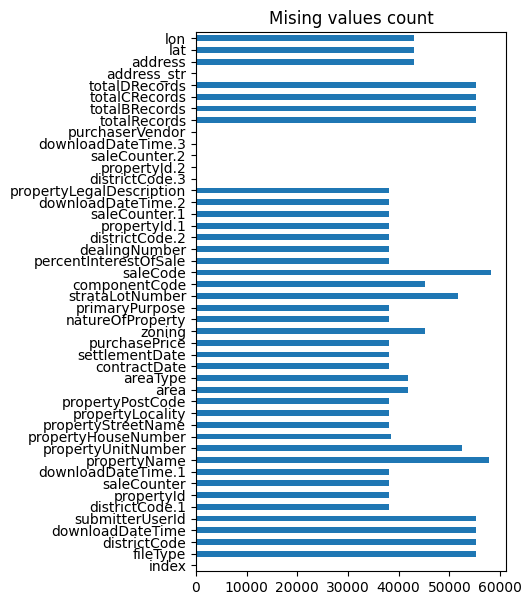

In [16]:
df_dat_with_lat_lon.isna().sum().plot(kind='barh', figsize=(4,7), title='Mising values count')

In [32]:
df_dat_with_lat_lon.columns

Index(['index', 'fileType', 'districtCode', 'downloadDateTime',
       'submitterUserId', 'districtCode.1', 'propertyId', 'saleCounter',
       'downloadDateTime.1', 'propertyName', 'propertyUnitNumber',
       'propertyHouseNumber', 'propertyStreetName', 'propertyLocality',
       'propertyPostCode', 'area', 'areaType', 'contractDate',
       'settlementDate', 'purchasePrice', 'zoning', 'natureOfProperty',
       'primaryPurpose', 'strataLotNumber', 'componentCode', 'saleCode',
       'percentInterestOfSale', 'dealingNumber', 'districtCode.2',
       'propertyId.1', 'saleCounter.1', 'downloadDateTime.2',
       'propertyLegalDescription', 'districtCode.3', 'propertyId.2',
       'saleCounter.2', 'downloadDateTime.3', 'purchaserVendor',
       'totalRecords', 'totalBRecords', 'totalCRecords', 'totalDRecords',
       'address_str', 'address', 'lat', 'lon'],
      dtype='object')

In [18]:
df_dat_with_lat_lon[['lat','lon']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58258 entries, 0 to 58257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     15196 non-null  float64
 1   lon     15196 non-null  float64
dtypes: float64(2)
memory usage: 910.4 KB


In [ ]:
df_dat_with_lat_lon.to_csv(DATA_DIR / "01_interim/valuergeneral/DAT_with_lat_lon.csv")